<a href="https://colab.research.google.com/github/Aditsaakmal/akmal/blob/main/akmal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Download data set


In [ ]:
#!pip install -q kaggle

1.1 Upload kaggle

In [ ]:
#!mkdir -p ~/.kaggle/
#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json #fungsi untuk memberikan izin akses file

1.2 Processing Download

In [ ]:
#!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

In [ ]:
#import zipfile

#with zipfile.ZipFile('diabetes-dataset.zip', 'r') as zip_ref:
  #zip_ref.extractall('/content/')

2. Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

3. Load & Display Dataset

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
display(df.head(2)) # display first record of data
display(df.tail(2)) # display last 4 record of data
display(df.sample(4)) # display ramdomly any number of record of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
408,8,197,74,0,0,25.9,1.191,39,1
485,0,135,68,42,250,42.3,0.365,24,1
293,1,128,48,45,194,40.5,0.613,24,1
385,1,119,54,13,50,22.3,0.205,24,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.1  The shape of the dataset

In [ ]:
#number of rows and colums
df.shape

(768, 9)

3.2 List types of all columns

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

3.3 Info of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3.4 Summary of the dataset

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Data Cleaning

4.1 Drp the duplicate

In [ ]:
# check the shape before drop duplicate

df.shape

df=df.drop_duplicates()

4.2 check the null value

In [ ]:
# check of null values,
# check the missing value iin any column,
# display number of null value in every column in dataset

df.isnull().sum()
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

check the no of zero value in dataset

In [ ]:
print ('No of zero value in Glucose', df[df['Glucose']==0].shape[0])
print ('No of zero value in Bloodpressure', df[df['BloodPressure']==0].shape[0])
print ('No of zero value in SkinThickness', df[df['SkinThickness']==0].shape[0])
print ('No of zero value in Insulin', df[df['Insulin']==0].shape[0])
print ('No of zero value in BMI', df[df['BMI']==0].shape[0])

No of zero value in Glucose 5
No of zero value in Bloodpressure 35
No of zero value in SkinThickness 227
No of zero value in Insulin 374
No of zero value in BMI 11


Replace the no of zero value with mean of columns

No of zero value in Glucose 0
Negative (0): 500
Positive [1]: 268


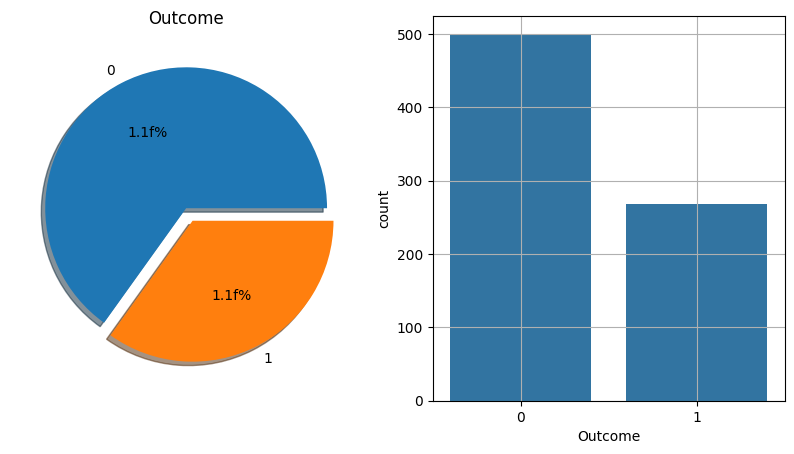

In [ ]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print ('No of zero value in Glucose', df[df['Glucose']==0].shape[0])

df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

df.describe()

# utcome count plot

f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome',data=df,ax=ax[1])
N,P = df['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive [1]:',P)
plt.grid()
plt.show()


Histogram of each feature

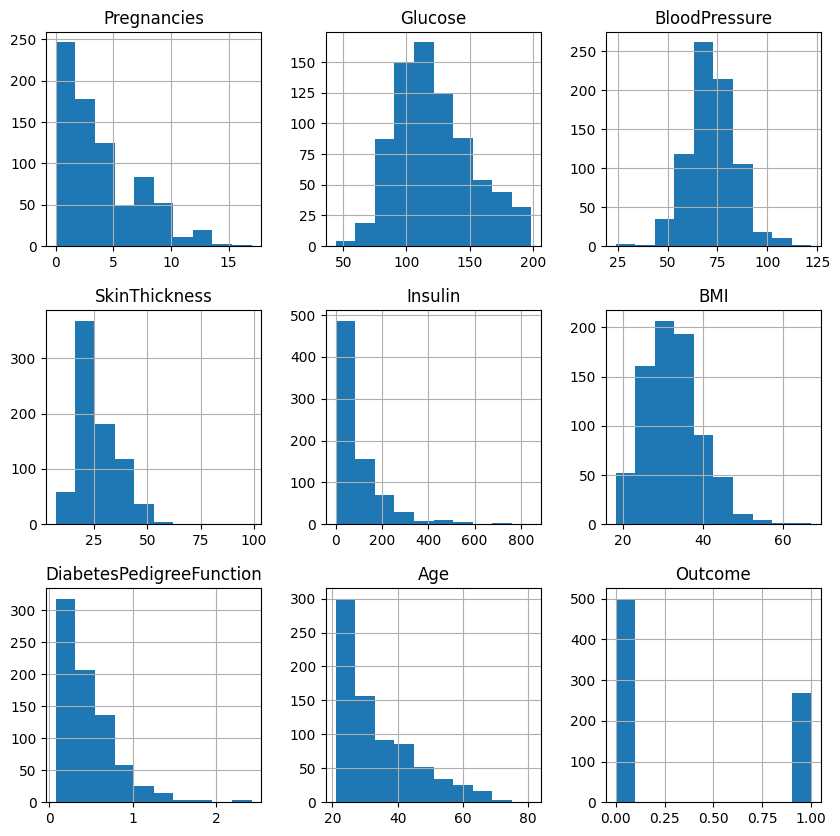

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

Scatter Plaot

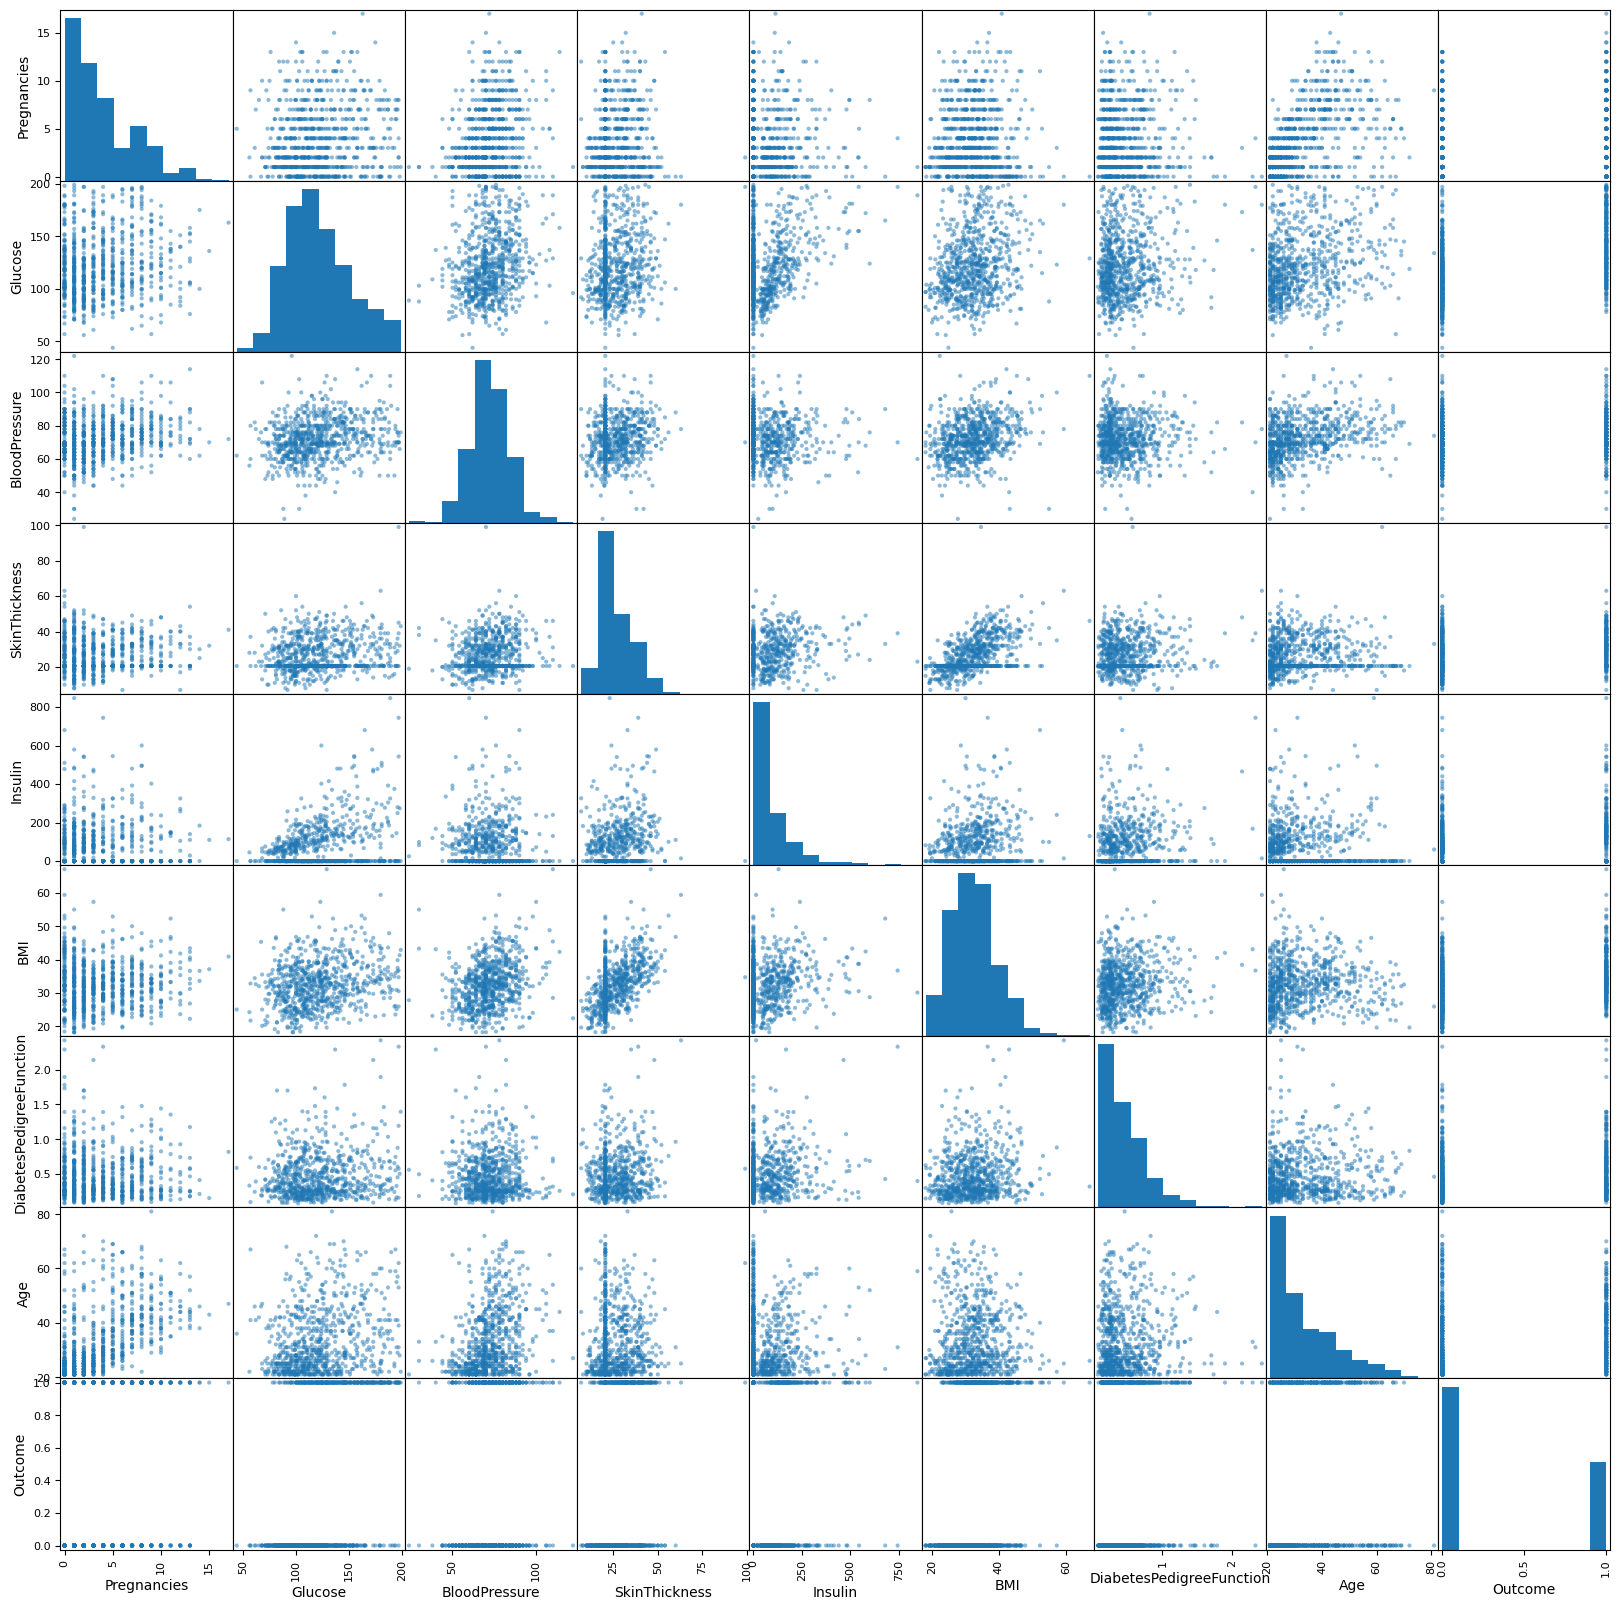

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20));

Analyzing realtionship between variable

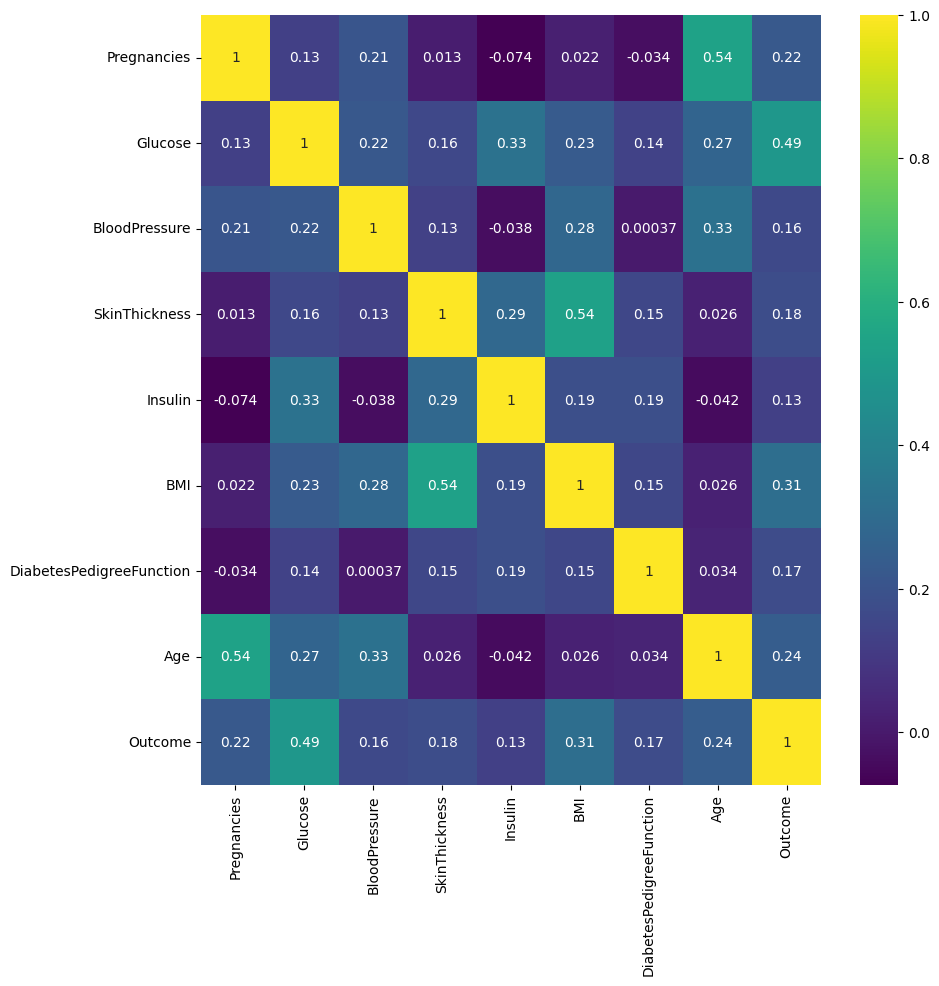

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

5. Split the data frame into X & Y

In [ ]:
target_name = 'Outcome'
y = df[target_name]
x = df.drop(target_name, axis=1)

x.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

6. Apply Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

7. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

x_train.shape, y_train.shape
x_test.shape, x_train.shape


((154, 8), (614, 8))

8. Build the classification ALgorithms SVM

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

9. Making Prediction

In [ ]:
sv_pred=sv.predict(x_test)
sv_pred.shape

(154,)

# 10. Model Evaluation

10.1  Train Score and Test Score

In [ ]:
#Train score & test score SVM
from sklearn.metrics import accuracy_score
print("Train Accuracy of SVM", sv.score(x_train, y_train)*100)
print("Accuracy (test) score of SVM", sv.score(x_test, y_test)*100)
print("Accuracy (test) score of SVM", accuracy_score(y_test, sv_pred)*100)

Train Accuracy of SVM 81.43322475570032
Accuracy (test) score of SVM 83.76623376623377
Accuracy (test) score of SVM 83.76623376623377


Confusion Matrix of "SVM"

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Confusion matrix of logistic regression
cm=confusion_matrix(y_test, sv_pred)
cm

array([[92,  5],
       [20, 37]])

Classifaction Report of SVM: 
               precision    recall  f1-score   support

           0     0.8214    0.9485    0.8804        97
           1     0.8810    0.6491    0.7475        57

    accuracy                         0.8377       154
   macro avg     0.8512    0.7988    0.8139       154
weighted avg     0.8435    0.8377    0.8312       154



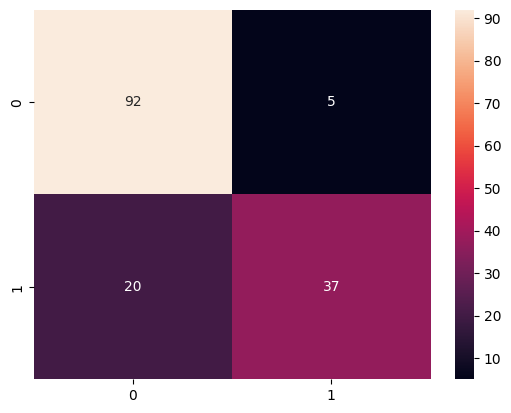

In [ ]:
sns.heatmap(confusion_matrix(y_test, sv_pred),annot=True,fmt='d')
print ('Classifaction Report of SVM: \n', classification_report(y_test, sv_pred, digits=4))

In [ ]:
#Making the confusion matrix of SVM
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, sv_pred)
cm

array([[92,  5],
       [20, 37]])

In [ ]:
#making the confusion ,atrix of svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test, sv_pred)

In [ ]:
print('TN - True Negative {}'. format(cm[0,0]))
print('FP - False Positive {}'. format(cm[0,1]))
print('FN - False Negative {}'. format(cm[1,0]))
print('TP - True Positive {}'. format(cm[1,1]))
print('Accuary Rate of SVM:{}'. format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification Rate of SVM:{}'. format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN - True Negative 92
FP - False Positive 5
FN - False Negative 20
TP - True Positive 37
Accuary Rate of SVM:83.76623376623377
Misclassification Rate of SVM:16.233766233766232


<Axes: >

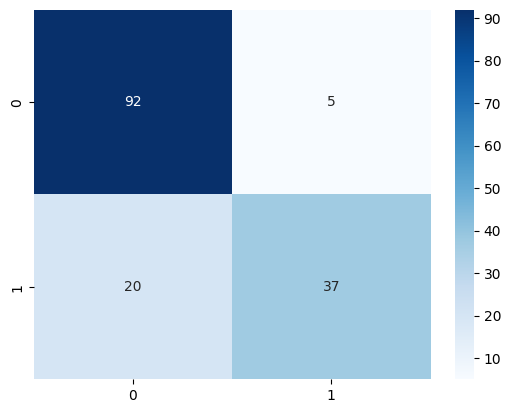

In [ ]:
sns.heatmap(confusion_matrix(y_test, sv_pred),cmap='Blues', annot=True, fmt="d")

CLASSIFICATION REPORT OF SVM

In [ ]:
print('Classification Report of SVM:\n', classification_report(y_test, sv_pred, digits=4))

Classification Report of SVM:
               precision    recall  f1-score   support

           0     0.8214    0.9485    0.8804        97
           1     0.8810    0.6491    0.7475        57

    accuracy                         0.8377       154
   macro avg     0.8512    0.7988    0.8139       154
weighted avg     0.8435    0.8377    0.8312       154



In [ ]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TF = cm[1,1]

In [ ]:
TN, FP, FN, TP

# PRECISISON (PPV-positive Prediction Value)
# Precision =TP/(TP+FP), Where TP = True positive, FP = false positive
TP,FP


(37, 5)

In [ ]:
Precision=TP/(TP+FP)
Precision

0.8809523809523809

In [ ]:
precision_score = TP/float(TP+FP)*100
print('Precision Score : {0:0.4f}'.format(precision_score))

Precision Score : 88.0952


In [ ]:
from sklearn.metrics import precision_score
print("precision score is:", precision_score(y_test, sv_pred)*100)
print("Micro Average precision score is:", precision_score(y_test, sv_pred, average='micro')*100)
print("Marco Average precision score is:", precision_score(y_test, sv_pred, average='micro')*100)
print("Weighted Average precision score is:", precision_score(y_test, sv_pred, average='weighted')*100)
print("Precision score on non weighted score is:", precision_score(y_test, sv_pred, average=None)*100)

precision score is: 88.09523809523809
Micro Average precision score is: 83.76623376623377
Marco Average precision score is: 83.76623376623377
Weighted Average precision score is: 84.34601113172542
Precision score on non weighted score is: [82.14285714 88.0952381 ]


In [ ]:
recall_score = TP/float(TP + FN)*100
print ('recall_sccore', recall_score)

recall_sccore 64.91228070175438


In [ ]:
TP, FN

(37, 20)

In [ ]:
recall_score = TP/FN

In [52]:
from sklearn.metrics import recall_score
print('Recall or Sensivity_score :', recall_score(y_test, sv_pred)*100)

Recall or Sensivity_score : 64.91228070175438


In [53]:
print("Micro Average Recall Score is :", recall_score(y_test, sv_pred, average='micro')*100)
print("Macro Average Recall Score is :", recall_score(y_test, sv_pred, average='macro')*100)
print("Weighted Average Recall score is :", recall_score(y_test, sv_pred, average='weighted')*100)
print("Recall Score on Non weighted score is :", recall_score(y_test, sv_pred, average=None)*100)

Micro Average Recall Score is : 83.76623376623377
Macro Average Recall Score is : 79.87882076324833
Weighted Average Recall score is : 83.76623376623377
Recall Score on Non weighted score is : [94.84536082 64.9122807 ]


In [54]:
print ('Classification Report of Neural Network: \n', classification_report(y_test, sv_pred, digits=4))

Classification Report of Neural Network: 
               precision    recall  f1-score   support

           0     0.8214    0.9485    0.8804        97
           1     0.8810    0.6491    0.7475        57

    accuracy                         0.8377       154
   macro avg     0.8512    0.7988    0.8139       154
weighted avg     0.8435    0.8377    0.8312       154



In [55]:
#FALSE POSITIVE RATE (FPR)
FPR = FP/float(FP+TN)*100
print('False Positive Rate : {0:0.4f}' .format(FPR))

False Positive Rate : 5.1546


In [56]:
FP,TN

(5, 92)

In [57]:
14/(14+83)

0.14432989690721648

In [59]:
#SPECIFICITY
specificity= TN / (TN + FP)*100
print('specificity :{0:0.4f}' .format(specificity))

specificity :94.8454


F1 SCORE

In [60]:
from sklearn.metrics import f1_score
print ('f1_score of macro:', f1_score(y_test, sv_pred)*100)

f1_score of macro: 74.74747474747475


In [64]:
print("Micro Average f1 Score is :", f1_score(y_test, sv_pred, average='micro')*100)
print("macro Average f1 Score is :", f1_score(y_test, sv_pred, average='macro')*100)
print("Weighted Average f1 Score is", f1_score(y_test, sv_pred, average ='weighted')*100)
print("f1 Score on Non weighted score is:", f1_score(y_test, sv_pred, average=None)*100)

Micro Average f1 Score is : 83.76623376623377
macro Average f1 Score is : 81.39287612971825
Weighted Average f1 Score is 83.11895441082045
f1 Score on Non weighted score is: [88.03827751 74.74747475]


ROC AUC of SVM

In [65]:
# Area Under Curve
auc = roc_auc_score(y_test, sv_pred)
print("ROC AUC SCORE of SVM is", auc)

ROC AUC SCORE of SVM is 0.7987882076324833


In [66]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test, sv_pred)*100,2)
print("ROC AUC of SVM is", auc)

ROC AUC of SVM is 79.88


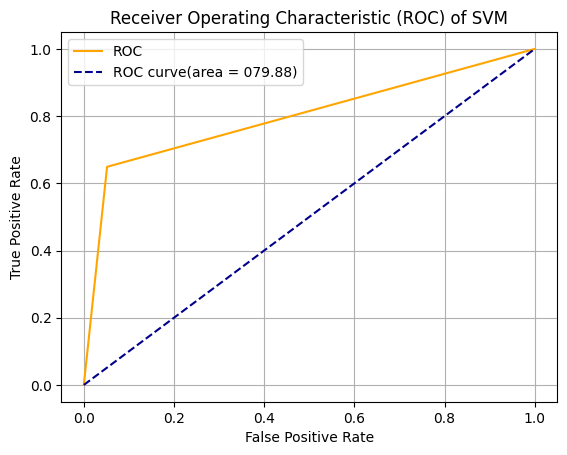

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='ROC curve(area = 0%.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of SVM')
plt.legend()
plt.grid()
plt.show()